##  Part a): Write your own Stochastic Gradient Descent  code, first step

In [1]:
from random import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def mean_squared_error(y_pred,y_actual):
    return np.square(np.subtract(y_actual,y_pred)).mean()

In [3]:
def sgd_OLS(X, y, lr=0.01, epochs=100, batch_size=200):
    w = np.random.randn(1,X.shape[1])
    b = np.random.randn(1,1)   
    
    for epoch in range(epochs):
        idx = np.random.randint(X.shape[0], size=batch_size)
        
        temp_X = X[idx,:]
        temp_Y = y[idx]
        
        Lw = w
        Lb = b
        loss = 0
        y_pred = []
        
        for i in range(batch_size):
            
            Lw = 2*(np.dot(w,temp_X[i]) + b - temp_Y[i])*temp_X[i]
            Lb = 2*(np.dot(w,temp_X[i]) + b - temp_Y[i])
            w = w - lr * Lw
            b = b - lr * Lb
            
            y_predicted = np.dot(temp_X[i],w.T) + b
            y_pred.append(y_predicted)
        
        loss = mean_squared_error(y_pred, temp_Y)
        if epoch % 100 == 99:   
            print("Epoch: %d, Loss: %.3f" %(epoch+1, loss))
        
    return loss,w,b

In [4]:
def sgd_OLS_momentum(X, y, lr=0.01, epochs=100, batch_size=10,gamma=0.9):
    w = np.random.randn(1,X.shape[1])
    b = np.random.randn(1,1)   
    
    for epoch in range(epochs):
        idx = np.random.randint(X.shape[0], size=batch_size)
        
        temp_X = X[idx,:]
        temp_Y = y[idx]
        
        Lw_prev = 0
        Lb_prev = 0
        Lw = w
        Lb = b
        loss = 0
        y_pred = []
        
        for i in range(batch_size):
            
            Lw = 2*(np.dot(w,temp_X[i]) + b - temp_Y[i])*temp_X[i]
            Lb = 2*(np.dot(w,temp_X[i]) + b - temp_Y[i])
            Lw = gamma*Lw_prev+(1-gamma)*Lw
            Lb = gamma*Lb_prev+(1-gamma)*Lb
            w = w - lr * Lw
            b = b - lr * Lb
            
            y_predicted = np.dot(temp_X[i],w.T) + b
            y_pred.append(y_predicted)
            
        
        loss = mean_squared_error(y_pred, temp_Y)
        if epoch % 100 == 99:   
            print("Epoch: %d, Loss: %.3f" %(epoch+1, loss))
        
    return loss,w,b

In [5]:
def sgd_Ridge(X, y, lr=0.01, epochs=100, batch_size=200, alpha = 0):
    w = np.random.randn(1,X.shape[1])
    b = np.random.randn(1,1)   
    
    for epoch in range(epochs):
        idx = np.random.randint(X.shape[0], size=batch_size)
        
        temp_X = X[idx,:]
        temp_Y = y[idx]
        
        Lw = w
        Lb = b
        loss = 0
        y_pred = []
        
        for i in range(batch_size):
            
            Lw = 2*(np.dot(w,temp_X[i]) + b - temp_Y[i])*temp_X[i] + alpha*w
            Lb = 2*(np.dot(w,temp_X[i]) + b - temp_Y[i]) + alpha*b
            w = w - lr * Lw
            b = b - lr * Lb
            
            y_predicted = np.dot(temp_X[i],w.T) + b
            y_pred.append(y_predicted)
        
        loss = mean_squared_error(y_pred, temp_Y)
        if epoch % 100 == 99:   
            print("Epoch: %d, Loss: %.3f" %(epoch+1, loss))
        
    return loss,w,b

In [6]:
X = [] #input values

for _ in range(1000):
    X.append([random(),random()])

In [7]:
def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

In [8]:
t = [] #targets
for point in X:
    t.append(FrankeFunction(point[0],point[1]))

In [9]:
#Testing the SGD algorithm for OLS
X = np.array(X)
y = np.array(t)

[loss,w,b] = sgd_OLS(X,y,lr = 0.01,epochs = 100,batch_size=500)
print(w)
print(b)

Epoch: 100, Loss: 0.130
[[-0.50101486 -0.68098603]]
[[1.02445655]]


In [10]:
#Testing the SGD with momentum algorithm for OLS
[loss,w,b] = sgd_OLS_momentum(X, y, lr=0.01, epochs=100, batch_size=500)
print(w)
print(b)

Epoch: 100, Loss: 0.151
[[-0.50927738 -0.71807824]]
[[1.02264338]]


In [32]:
#Testing the SGD algorithm for Ridge Regression
[loss,w,b] = sgd_Ridge(X, y, lr=0.01, epochs=100, batch_size=500)
print(w)
print(b)

Epoch: 100, Loss: 0.139
[[-0.51068045 -0.70552393]]
[[1.02295609]]


### Comparing the above results with the linear regression and ridge regression models from sklearn

In [24]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(X, t)

print(clf.coef_)
print(clf.intercept_)

[-0.51031233 -0.71955881]
1.0283847320219388


In [25]:
from sklearn.linear_model import Ridge

clf = Ridge(alpha=1.0)
clf.fit(X, t)

print(clf.coef_)
print(clf.intercept_)

[-0.50446221 -0.71050952]
1.0209180949668393


### Result analysis of the results of SGD for OLS as function of the chosen learning rates, the number of mini-batches and epochs

Epoch: 100, Loss: 0.158
Epoch: 100, Loss: 0.147
Epoch: 100, Loss: 0.147
Epoch: 100, Loss: 0.159
Epoch: 100, Loss: 0.140
Epoch: 100, Loss: 0.155
Epoch: 100, Loss: 0.172
Epoch: 100, Loss: 0.152
Epoch: 100, Loss: 0.157
Epoch: 100, Loss: 0.155
Epoch: 100, Loss: 0.154
Epoch: 100, Loss: 0.154
Epoch: 100, Loss: 0.152
Epoch: 100, Loss: 0.161
Epoch: 100, Loss: 0.132
Epoch: 100, Loss: 0.145
Epoch: 100, Loss: 0.138
Epoch: 100, Loss: 0.150
Epoch: 100, Loss: 0.140
Epoch: 100, Loss: 0.137


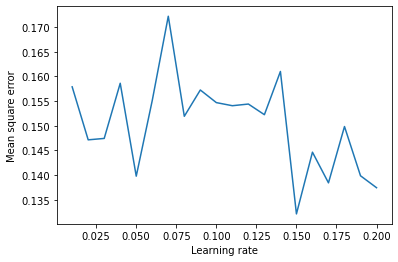

In [34]:
lr = np.arange(0.01, 0.21, 0.01)
loss_lst = []
for learning_rate in lr:
    [loss,w,b] = sgd_OLS(X,y,lr = learning_rate,epochs = 100,batch_size=500)
    loss_lst.append(loss)
plt.plot(lr,loss_lst,'-')
plt.xlabel('Learning rate')
plt.ylabel('Mean square error')
plt.show()

Epoch: 100, Loss: 0.157
Epoch: 100, Loss: 0.129
Epoch: 100, Loss: 0.143
Epoch: 100, Loss: 0.152
Epoch: 100, Loss: 0.146
Epoch: 100, Loss: 0.133
Epoch: 100, Loss: 0.133
Epoch: 100, Loss: 0.147
Epoch: 100, Loss: 0.159
Epoch: 100, Loss: 0.162


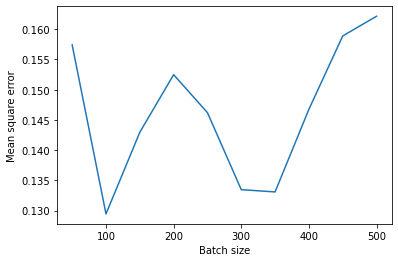

In [35]:
batch_size = np.arange(50, 501, 50)
loss_lst = []
for size in batch_size:
    [loss,w,b] = sgd_OLS(X,y,lr = 0.01,epochs = 100,batch_size=size)
    loss_lst.append(loss)
plt.plot(batch_size,loss_lst,'-')
plt.xlabel('Batch size')
plt.ylabel('Mean square error')
plt.show()

Epoch: 100, Loss: 0.131
Epoch: 100, Loss: 0.146
Epoch: 100, Loss: 0.163
Epoch: 100, Loss: 0.161
Epoch: 100, Loss: 0.139
Epoch: 100, Loss: 0.141
Epoch: 100, Loss: 0.158
Epoch: 100, Loss: 0.151
Epoch: 100, Loss: 0.144
Epoch: 100, Loss: 0.153
Epoch: 100, Loss: 0.139
Epoch: 200, Loss: 0.154


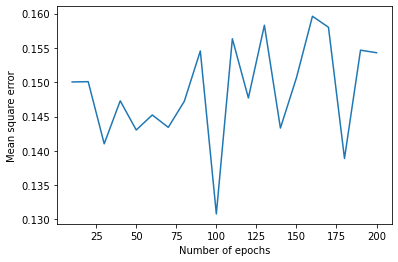

In [36]:
epochs = np.arange(10, 201, 10)
loss_lst = []
for epoch_num in epochs:
    [loss,w,b] = sgd_OLS(X,y,lr = 0.01,epochs = epoch_num,batch_size=500)
    loss_lst.append(loss)
plt.plot(epochs,loss_lst,'-')
plt.xlabel('Number of epochs')
plt.ylabel('Mean square error')
plt.show()

### Result analysis of the results of SGD for Ridge Regression as function of alpha

Epoch: 100, Loss: 0.153
Epoch: 100, Loss: 0.099
Epoch: 100, Loss: 0.098
Epoch: 100, Loss: 0.090
Epoch: 100, Loss: 0.094
Epoch: 100, Loss: 0.097
Epoch: 100, Loss: 0.096
Epoch: 100, Loss: 0.085
Epoch: 100, Loss: 0.095
Epoch: 100, Loss: 0.109
Epoch: 100, Loss: 0.110


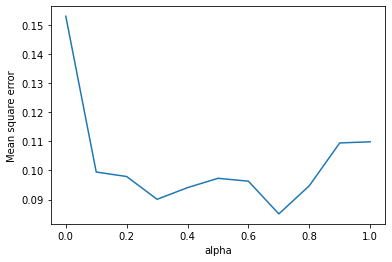

In [40]:
alpha = np.arange(0, 1.01, 0.1)
loss_lst = []
for a in alpha:
    [loss,w,b] = sgd_Ridge(X,y,lr = 0.01,epochs = 100,batch_size=500,alpha = a)
    loss_lst.append(loss)
plt.plot(alpha,loss_lst,'-')
plt.xlabel('alpha')
plt.ylabel('Mean square error')
plt.show()

## Part b): Writing your own Neural Network code

In [10]:
import math 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class NeuralNet:
    def Linear(self,x):
        return x*np.ones(len(x))
    def dLinear(self,x):
        return np.ones(len(x)).reshape(x.shape)
#####################################
    def Relu(self,x):
        l = np.zeros(len(x))
        for i in range(len(x)):
            l[i] = max(0,x[i])
        return l.reshape(x.shape)
    
    def dRelu(self,x):
        l = np.zeros(len(x))
        for i in range(len(x)):
            if x[i] > 0:
                l[i] = 1
            else:
                l[i] = 0
        return l.reshape(x.shape)
###################################
    def LeakyRelu(self,x,a=0.01):
        l = np.zeros(len(x))
        for i in range(len(x)):
            l[i] = max(a*x[i],x[i])
        return l.reshape(x.shape)
    
    def dLeakyRelu(self,x,a=0.01):
        l = np.zeros(len(x))
        for i in range(len(x)):
            if x[i] > 0:
                l[i] = 1
            else:
                l[i] = a
        return l.reshape(x.shape)
###############################
    def Sigmoid(self,x):
        l = np.zeros(len(x))
        for i in range(len(x)):
            if x[i] >= -100:
                l[i] = 1/(1 + np.exp(-x[i]))
            else:
                l[i] = 0
        return l.reshape(x.shape)
    
    def dSigmoid(self,x):
        l = np.zeros(len(x))
        for i in range(len(x)):
            l[i] = (np.exp(-x[i]) / (np.exp(-x[i]) + 1)**2)
        return l.reshape(x.shape)
        
#################################
    def Tanh(self,x):
        l = np.zeros(len(x))
        for i in range(len(x)):
            l[i] = np.tanh(x[i])
        return l.reshape(x.shape)
        
    def dTanh(self,x):
        l = np.zeros(len(x))
        for i in range(len(x)):
            l[i] =  1 - np.tanh(x[i])**2
        return l.reshape(x.shape)
################################


    def __init__(self,num_layers,num_per_layer,input_size,neuron_af = "Sigmoid",output_af = "Linear",lr = 0.001,optim='SGD'):
        self.weights = [np.random.normal(0,1,(num_per_layer,input_size))]
        self.input_size = input_size
        for i in range(num_layers - 2):
            self.weights.append(np.random.normal(0,1,(num_per_layer,num_per_layer)))
        self.weights.append(np.random.normal(0,1,(1,num_per_layer)))
        
        self.biases = [np.zeros(num_per_layer).reshape(-1,1) for _ in range(num_layers - 1)]
        
        self.biases.append(np.zeros(1))

        self.num_layers = num_layers
        self.lr = lr
        if neuron_af == "Sigmoid":
            self.f = self.Sigmoid
            self.df = self.dSigmoid
        elif neuron_af == 'Tanh':
            self.f = self.Tanh
            self.df = self.dTanh
        elif neuron_af == 'Linear':
            self.f = self.Linear
            self.df = self.dLinear
        elif neuron_af == 'Relu':
            self.f = self.Relu
            self.df = self.dRelu
        elif neuron_af == 'LeakyRelu':
            self.f = self.LeakyRelu
            self.df = self.dLeakyRelu
        else:
            print("Wrong Input!!!!")
            quit()
        
        
        if output_af == "Sigmoid":
            self.f_o = self.Sigmoid
            self.df_o = self.dSigmoid
        elif output_af == 'Tanh':
            self.f_o = self.Tanh
            self.df_o = self.dTanh
        elif output_af == 'Linear':
            self.f_o = self.Linear
            self.df_o = self.dLinear
        elif output_af == 'Relu':
            self.f_o = self.Relu
            self.df_o = self.dRelu
        elif output_af == 'LeakyRelu':
            self.f_o = self.LeakyRelu
            self.df_o = self.dLeakyRelu
        else:
            print("Wrong Input!!!!")
            quit()

    def forward(self,input):
        input = input.reshape(-1,1)
        self.n = [self.weights[0].dot(input) + self.biases[0]]
        self.outputs = [self.f(self.n[0])]
        for i in range(1,self.num_layers - 1):
            self.n.append(self.weights[i].dot(self.outputs[i-1]) + self.biases[i])
            self.outputs.append(self.f(self.n[i]))
        i += 1
        self.n.append(self.weights[i].dot(self.outputs[i-1]) + self.biases[i])
        self.outputs.append(self.f_o(self.n[i]))
        return self.outputs[len(self.outputs) - 1]

    def backwards(self,target):
        M = self.num_layers - 1
        error = (target - self.outputs[M])
        
        sM = -2*self.df_o(self.n[M])*error
        
        sens = [ 0 for _ in range(M+1)]
        sens[M] = sM

        self.weights[M] = self.weights[M] - self.lr*sM*(self.outputs[M-1].T)
        self.biases[M] = self.biases[M] - self.lr*sM

        pos = [M - i for i in range(1,M + 1)]
        ####################### SGD ############################################
        for p in pos:
            F = np.diag(self.df(self.n[p].flatten()))
            W = self.weights[p+1].T
            sens[p] = F.dot(W).dot(sens[p+1])
            self.weights[p] = self.weights[p] - self.lr*sens[p].dot(self.outputs[p-1].T)
            self.biases[p] = self.biases[p] - self.lr*sens[p]
        return error**2
        ########################################################################

### Using the neural network to solve a regression problem (franke function)

In [64]:
nn = NeuralNet(input_size=2,num_layers= 3,num_per_layer = 10,output_af='Tanh',lr=0.01)

input = np.random.random((30,2))
output = []

for i in range(30):
    output.append(FrankeFunction(input[i,0],input[i,1]))

output = np.array(output)

for epoch in range(1000):
    MSE = 0
    for i in range(30):
        out = nn.forward(input[i])
        err = nn.backwards(output[i])
        MSE += err
    if epoch % 100 == 99:
        print("Epoch",epoch+1,": Error =",MSE.flatten()/len(input))

Epoch 100 : Error = [0.02781605]
Epoch 200 : Error = [0.021977]
Epoch 300 : Error = [0.01999194]
Epoch 400 : Error = [0.01929323]
Epoch 500 : Error = [0.01903567]
Epoch 600 : Error = [0.01892802]
Epoch 700 : Error = [0.01887651]
Epoch 800 : Error = [0.01885442]
Epoch 900 : Error = [0.01885656]
Epoch 1000 : Error = [0.01888478]


### Verify the above results with a PyTorch Neural Network

In [65]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ANN(nn.Module):
    def __init__(self):
       super().__init__()
       self.fc1 = nn.Linear(in_features=2, out_features=10)
       self.fc2 = nn.Linear(in_features=10, out_features=10)
       self.output = nn.Linear(in_features=10, out_features=1)
 
    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = torch.tanh(self.output(x))
        return x

X_train = torch.tensor(input)
Y_train = torch.tensor(output)

model = ANN()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

epochs = 1000
loss_arr = []
for i in range(epochs):
   y_hat = model.forward(X_train.float())
   loss = criterion(y_hat, Y_train.float().reshape((len(Y_train), 1)))
   loss_arr.append(loss)
 
   if i % 100 == 99:
       print(f'Epoch {i+1}: Error = {loss}')
 
   optimizer.zero_grad()
   loss.backward()
   optimizer.step()

Epoch 100: Error = 0.10018599033355713
Epoch 200: Error = 0.08000524342060089
Epoch 300: Error = 0.07468322664499283
Epoch 400: Error = 0.07311097532510757
Epoch 500: Error = 0.07261282950639725
Epoch 600: Error = 0.07244668155908585
Epoch 700: Error = 0.07238781452178955
Epoch 800: Error = 0.07236455380916595
Epoch 900: Error = 0.07235325872898102
Epoch 1000: Error = 0.07234605401754379


Both the PyTorch Neural Network and our Neural Network seem to converge when we use learning rate 0.001 and 10 neurons per layer, as the mean square error diminishes after 1000 epochs. Our Neural Network happens to reach a slightly better solution.

### Part c): Testing different activation functions

In [72]:
nn_list = []
nn_list.append(NeuralNet(input_size=2,num_layers=3,num_per_layer= 10,neuron_af = "Sigmoid",output_af='Tanh',lr=0.02))
nn_list.append(NeuralNet(input_size=2,num_layers=3,num_per_layer= 10,neuron_af = "Relu",output_af='Tanh',lr=0.02))
nn_list.append(NeuralNet(input_size=2,num_layers=3,num_per_layer= 10,neuron_af = "LeakyRelu",output_af='Tanh',lr=0.02))

nn_af_list = ["SIGMOID","RELU","LEAKY RELU"]

input = np.random.random((50,2))
output = []

for i in range(50):
    output.append(FrankeFunction(input[i,0],input[i,1]))
output = np.array(output)

for nn,af in zip(nn_list,nn_af_list):
    print("="*10,af,"="*10)
    for epoch in range(500):
        MSE = 0
        for i in range(50):
            out = nn.forward(input[i])
            err = nn.backwards(output[i])
            MSE += err
    print("Epoch",epoch+1,": Error =",MSE.flatten()/50)

========== SIGMOID ==========
Epoch 500 : Error = [0.10231293]
========== RELU ==========
Epoch 500 : Error = [0.38251508]
========== LEAKY RELU ==========
Epoch 500 : Error = [0.38253817]


The sigmoid activation function seems to train the data a little better. ReLU and Leaky ReLU activation functions give very similar results.

### Part d): Classification  analysis using neural networks

We will process the Wisconsin Breast Cancer data set here. As we have to solve a binary classification problem, an appropriate activation function for the output layer is Sigmoid, as it takes values between 0 and 1. 

In [11]:
data = pd.read_csv('data.csv',index_col= False)

data['diagnosis'].replace({'M':1,'B':0},inplace= True)


X_train, X_test, Y_train, Y_test = train_test_split(data.drop(['diagnosis','id','Unnamed: 32'], axis=1), data['diagnosis'], stratify= data['diagnosis'], test_size=0.25)
cols = X_train.columns
for col in cols:
    X_train[col] = StandardScaler().fit_transform(X_train[col].values.reshape(-1,1))

print(data.info())

nn = NeuralNet(input_size=X_train.shape[1],num_layers= 5,num_per_layer= 3,lr=0.02,output_af = "Sigmoid")
X = X_train.to_numpy()
y = Y_train.to_numpy()

for epoch in range(100):
    MSE = 0
    for i in range(X_train.shape[0]):
        nn.forward(X[i])
        err = nn.backwards(y[i])    
        MSE += err
    if epoch % 10 == 9:
        print("Epoch",epoch+1,": MSE =",MSE/X_train.shape[0])

counter = 0
for i in range(X_train.shape[0]):
    out = nn.forward(X[i])
    if (out >= 0.5 and y[i] == 1) or (out <= 0.5 and y[i] == 0):
        counter += 1
print("Train accuracy:",counter / X_train.shape[0])
    
    
X = X_test.to_numpy()
y = Y_test.to_numpy()
counter = 0
for i in range(X_test.shape[0]):
    out = nn.forward(X[i])
    if (out >= 0.5 and y[i] == 1) or (out <= 0.5 and y[i] == 0):
        counter += 1

print("Test accuracy:",counter / X_test.shape[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Verify the above results with a PyTorch Neural Network

In [83]:
import torch
import torch.nn as nn
import torch.nn.functional as F

data = pd.read_csv("data.csv")
data['diagnosis'].replace({'M':1,'B':0},inplace= True)
X_train, X_test, Y_train, Y_test = train_test_split(data.drop(['diagnosis','id','Unnamed: 32'], axis=1), data['diagnosis'], stratify= data['diagnosis'], test_size=0.25)
cols = X_train.columns
for col in cols:
    X_train[col] = StandardScaler().fit_transform(X_train[col].values.reshape(-1,1))

class ANN2(nn.Module):
    def __init__(self):
       super().__init__()
       self.fc1 = nn.Linear(in_features=30, out_features=10)
       self.fc2 = nn.Linear(in_features=10, out_features=10)
       self.fc3 = nn.Linear(in_features=10, out_features=10)
       self.output = nn.Linear(in_features=10, out_features=1)
 
    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        x = torch.sigmoid(self.output(x))
        return x

X_train = torch.tensor(X_train.values)
Y_train = torch.tensor(Y_train.values)

model = ANN2()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.02)

epochs = 100
loss_arr = []
for i in range(epochs):
   y_hat = model.forward(X_train.float())
   loss = criterion(y_hat, Y_train.float().reshape((len(Y_train), 1)))
   loss_arr.append(loss)
 
   if i % 10 == 0:
       print(f'Epoch {i+1} Loss = {loss}')
 
   optimizer.zero_grad()
   loss.backward()
   optimizer.step()

preds = 0

with torch.no_grad():
   for i in range(X_train.shape[0]):             
       y_hat = model.forward(X_train[i].float())
       if (y_hat >= 0.5 and Y_train[i] == 1) or (y_hat <= 0.5 and Y_train[i] == 0):
         preds += 1
print("Train data accuracy:", preds / X_train.shape[0])

preds = 0
X_test = torch.tensor(X_test.values)
Y_test = torch.tensor(Y_test.values)

with torch.no_grad():
   for i in range(X_test.shape[0]):
       
       
       y_hat = model.forward(X_test[i].float())
       if (y_hat >= 0.5 and Y_test[i] == 1) or (y_hat <= 0.5 and Y_test[i] == 0):
         preds += 1
print("Test data accuracy:",preds / X_test.shape[0])

Epoch 1 Loss = 0.2360067367553711
Epoch 11 Loss = 0.23562468588352203
Epoch 21 Loss = 0.23530173301696777
Epoch 31 Loss = 0.23502852022647858
Epoch 41 Loss = 0.23479709029197693
Epoch 51 Loss = 0.23460084199905396
Epoch 61 Loss = 0.23443424701690674
Epoch 71 Loss = 0.23429268598556519
Epoch 81 Loss = 0.23417219519615173
Epoch 91 Loss = 0.2340695708990097
Train data accuracy: 0.6267605633802817
Test data accuracy: 0.6293706293706294


Based on the above results, we find out that our "from scratch" model and the PyTorch model have very similar performances despite the fact that they have a somewhat different structure. The fact that the training data accuracy is approximately the same as the testing data accuracy verifies that there is no overfitting.

### Part e): Write your Logistic Regression code, final step

In [17]:
class LogisticRegression:
    def __init__(self,max_iter = 250):
        self.max_iter = max_iter
    
    def sigmoid(self,z):
        return 1 / (1 + np.exp(-z))

    def l2(self,X,y,l = 1):
        sum = 0
        for i in range(X.shape[0]):
            sum += (X[i].dot(self.w) - y[i])**2
        return sum + np.array(l*self.w.T.dot(self.w))
    
    def fit(self,X_train,Y_train,lr = 0.001):
        m,n = X_train.shape
        self.w = np.zeros((n,1))
        
        for _ in range(self.max_iter):
            err = 0
            for i in range(m):
                z = X_train[i].dot(self.w)
                h = self.sigmoid(z)
                err += h - Y_train[i]
            l = 1
            for i in range(n):
                dw = (1/m)*(err + l*self.w[i])
                self.w[i] = self.w[i] - lr*dw
    def predict(self,X_test):
        h = []
        for i in range(X_test.shape[0]):
            z = X_test[i].dot(self.w)
            h.append(self.sigmoid(z))
        return h

In [21]:
log_reg = LogisticRegression()
log_reg.fit(X_train.to_numpy(),Y_train.to_numpy())

X = X_test.to_numpy()
y = Y_test.to_numpy()

h = log_reg.predict(X)
l2 = log_reg.l2(X=X,y=y)
print("l2:",l2)
acc = 0
for i in range(X_test.shape[0]):
    if (h[i] > 0.5 and y[i] == 1) or (h[i] <= 0.5 and y[i] == 0):
        acc += 1

print("Test data accuracy:",acc / X_test.shape[0])

l2: [[655231.19956293]]
Test data accuracy: 0.6293706293706294


Our logistic regression code produces the same results as our neural network, as we get an accuracy of about 63% for our test data. In the next step we are going to use the logistic regression function from the sklearn library and compare the results:

In [16]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter = 250)
log_reg.fit(X_train,Y_train)

print("Train data accuracy:",log_reg.score(X_train,Y_train))
print("Test data accuracy:",log_reg.score(X_test,Y_test))

Train data accuracy: 0.9859154929577465
Test data accuracy: 0.3706293706293706


In this case, there is overfitting, as the model fits exactly the training data (about 98,6% accuracy), whereas the predictions for the test data are not decent.

### Part f) Critical evaluation of the various algorithms

Taking all the above into consideration, it is clear that neural networks are flexible, as they are suitable for both regression and classification problems. In fact they are very capable of handling nonlinear data with large number of inputs. Once they are trained, they can make predictions very fast. On the other hand, neural networks are sometimes very expensive computationally and time consuming and, as a result, traditional CPUs are often not adequate for their training. Moreover, the problem of overfitting may arise, if the training is not done carefully.

Logistic regression is quite easy to implement and very efficient to train. It is suitable for binary classification, but it can easily extend to multiple classes. However, if we only have a limited number of observations and a lot of features logistic regression may not be the most stable choice, as it might lead to overfitting. A characteristic case is the Wisconsin Breast Cancer Data which we processed above.



To sum up, we believe that in practice logistic regression is better for binary classification than a neural network because neural networks are more difficult to train and they are usually more prone to overfitting.